#**Desarrollo de un modelo para predecir los resultados de las calificaciones de las pruebas de estado de educación media en Colombia de acuerdo con las características demográficas de los participantes**

**EDA**

In [ ]:
#Importar Librerías

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV

#Cargue del documento y revisión inicial

ruta_base = 'C:/Users/Jose Santamaria/Downloads/'
archivo = ruta_base + "resultados_filtrados_3.xlsx"

df = pd.read_excel(archivo)
print(df.head())


   PERIODO ESTU_TIPODOCUMENTO COLE_AREA_UBICACION COLE_BILINGUE  \
0    20201                 TI              URBANO             S   
1    20201                 TI              URBANO             N   
2    20201                 TI              URBANO             N   
3    20201                 TI               RURAL             S   
4    20201                 TI              URBANO             N   

  COLE_CALENDARIO      COLE_CARACTER COLE_DEPTO_UBICACION COLE_GENERO  \
0               B          ACADÉMICO                VALLE       MIXTO   
1               B          ACADÉMICO               BOGOTÁ    FEMENINO   
2               B  TÉCNICO/ACADÉMICO                VALLE       MIXTO   
3               B          ACADÉMICO            ANTIOQUIA       MIXTO   
4               B  TÉCNICO/ACADÉMICO                VALLE       MIXTO   

  COLE_JORNADA COLE_MCPIO_UBICACION  ... FAMI_TIENEAUTOMOVIL  \
0     COMPLETA                 CALI  ...                  Si   
1     COMPLETA          BOGOTÁ

In [ ]:
#Revisión y transformación de tipología de variables

df['PERIODO'] = df['PERIODO'].astype(str).str[:4]
print(df.head())


  PERIODO ESTU_TIPODOCUMENTO COLE_AREA_UBICACION COLE_BILINGUE  \
0    2020                 TI              URBANO             S   
1    2020                 TI              URBANO             N   
2    2020                 TI              URBANO             N   
3    2020                 TI               RURAL             S   
4    2020                 TI              URBANO             N   

  COLE_CALENDARIO      COLE_CARACTER COLE_DEPTO_UBICACION COLE_GENERO  \
0               B          ACADÉMICO                VALLE       MIXTO   
1               B          ACADÉMICO               BOGOTÁ    FEMENINO   
2               B  TÉCNICO/ACADÉMICO                VALLE       MIXTO   
3               B          ACADÉMICO            ANTIOQUIA       MIXTO   
4               B  TÉCNICO/ACADÉMICO                VALLE       MIXTO   

  COLE_JORNADA COLE_MCPIO_UBICACION  ... FAMI_TIENEAUTOMOVIL  \
0     COMPLETA                 CALI  ...                  Si   
1     COMPLETA          BOGOTÁ D.C. 

In [ ]:
#Renombrar las columnas

df = df.rename(columns={
    'ESTU_TIPODOCUMENTO': 'TIPODOC',
    'COLE_AREA_UBICACION': 'AREA_UBICACION',
    'COLE_CARACTER': 'COLE_TIPO',
    'COLE_DEPTO_UBICACION': 'DEPTO',
    'COLE_MCPIO_UBICACION': 'MCPIO',
    'FAMI_TIENEAUTOMOVIL': 'TIENE_AUTO',
    'FAMI_TIENECOMPUTADOR': 'TIENE_COMPUTADOR',
    'FAMI_TIENEINTERNET': 'TIENE_INTERNET',
    'FAMI_TIENELAVADORA': 'TIENE_LAVADORA',
    'FAMI_PERSONASHOGAR': 'PERSONAS_HOGAR',
    'FAMI_ESTRATOVIVIENDA':'ESTRATO'
})

print(df.head())


  PERIODO TIPODOC AREA_UBICACION COLE_BILINGUE COLE_CALENDARIO  \
0    2020      TI         URBANO             S               B   
1    2020      TI         URBANO             N               B   
2    2020      TI         URBANO             N               B   
3    2020      TI          RURAL             S               B   
4    2020      TI         URBANO             N               B   

           COLE_TIPO      DEPTO COLE_GENERO COLE_JORNADA        MCPIO  ...  \
0          ACADÉMICO      VALLE       MIXTO     COMPLETA         CALI  ...   
1          ACADÉMICO     BOGOTÁ    FEMENINO     COMPLETA  BOGOTÁ D.C.  ...   
2  TÉCNICO/ACADÉMICO      VALLE       MIXTO       MAÑANA         CALI  ...   
3          ACADÉMICO  ANTIOQUIA       MIXTO     COMPLETA  LA ESTRELLA  ...   
4  TÉCNICO/ACADÉMICO      VALLE       MIXTO       MAÑANA         CALI  ...   

  TIENE_AUTO TIENE_COMPUTADOR TIENE_INTERNET TIENE_LAVADORA PUNT_INGLES  \
0         Si               Si             Si             Si

In [ ]:
#Eliminación de valores nulos

initial_count = len(df)

df = df.dropna(subset=['PUNT_GLOBAL'])
df = df[df['PUNT_GLOBAL'] != 0]
final_count = len(df)
removed_count = initial_count - final_count
print(f"\nSe eliminaron {removed_count} filas con valores nulos, NaN o 0 en 'PUNT_GLOBAL'.")
print(f"Número de filas inicial: {initial_count}")
print(f"Número de filas restantes: {final_count}")
print(df.head())



Se eliminaron 9 filas con valores nulos, NaN o 0 en 'PUNT_GLOBAL'.
Número de filas inicial: 1116900
Número de filas restantes: 1116891
  PERIODO TIPODOC AREA_UBICACION COLE_BILINGUE COLE_CALENDARIO  \
0    2020      TI         URBANO             S               B   
1    2020      TI         URBANO             N               B   
2    2020      TI         URBANO             N               B   
3    2020      TI          RURAL             S               B   
4    2020      TI         URBANO             N               B   

           COLE_TIPO      DEPTO COLE_GENERO COLE_JORNADA        MCPIO  ...  \
0          ACADÉMICO      VALLE       MIXTO     COMPLETA         CALI  ...   
1          ACADÉMICO     BOGOTÁ    FEMENINO     COMPLETA  BOGOTÁ D.C.  ...   
2  TÉCNICO/ACADÉMICO      VALLE       MIXTO       MAÑANA         CALI  ...   
3          ACADÉMICO  ANTIOQUIA       MIXTO     COMPLETA  LA ESTRELLA  ...   
4  TÉCNICO/ACADÉMICO      VALLE       MIXTO       MAÑANA         CALI  ...   

In [ ]:
print(df['PERSONAS_HOGAR'].unique())

['5 a 6' '3 a 4' '7 a 8' nan '1 a 2' '9 o más']


In [ ]:
#Reemplazar NaN por 0 y 0 por 'na' en la columna 'PERSONAS_HOGAR'

df['PERSONAS_HOGAR'] = df['PERSONAS_HOGAR'].fillna('N/A')

print(df['PERSONAS_HOGAR'].unique())


['5 a 6' '3 a 4' '7 a 8' 'N/A' '1 a 2' '9 o más']


In [ ]:
#Revisión de la cantidad de valores nulos en la columna 'PUNT_GLOBLA'

nan_count = df['PUNT_GLOBAL'].isnull().sum()
print(f"\nNumber of NaN values in 'PUNT_GLOBAL': {nan_count}\n")

print(df.describe())



Number of NaN values in 'PUNT_GLOBAL': 0

        PUNT_INGLES  PUNT_MATEMATICAS  PUNT_SOCIALES_CIUDADANAS  \
count  1.112750e+06      1.116891e+06              1.116891e+06   
mean   5.057058e+01      5.097037e+01              4.807430e+01   
std    1.373710e+01      1.243061e+01              1.212594e+01   
min    0.000000e+00      0.000000e+00              0.000000e+00   
25%    4.000000e+01      4.200000e+01              3.800000e+01   
50%    4.900000e+01      5.100000e+01              4.700000e+01   
75%    5.900000e+01      6.000000e+01              5.700000e+01   
max    1.000000e+02      1.000000e+02              1.000000e+02   

       PUNT_C_NATURALES  PUNT_LECTURA_CRITICA   PUNT_GLOBAL  
count      1.116891e+06          1.116891e+06  1.116891e+06  
mean       4.941245e+01          5.311940e+01  2.520245e+02  
std        1.057585e+01          1.090613e+01  5.297219e+01  
min        0.000000e+00          0.000000e+00  1.200000e+01  
25%        4.100000e+01          4.500000e+

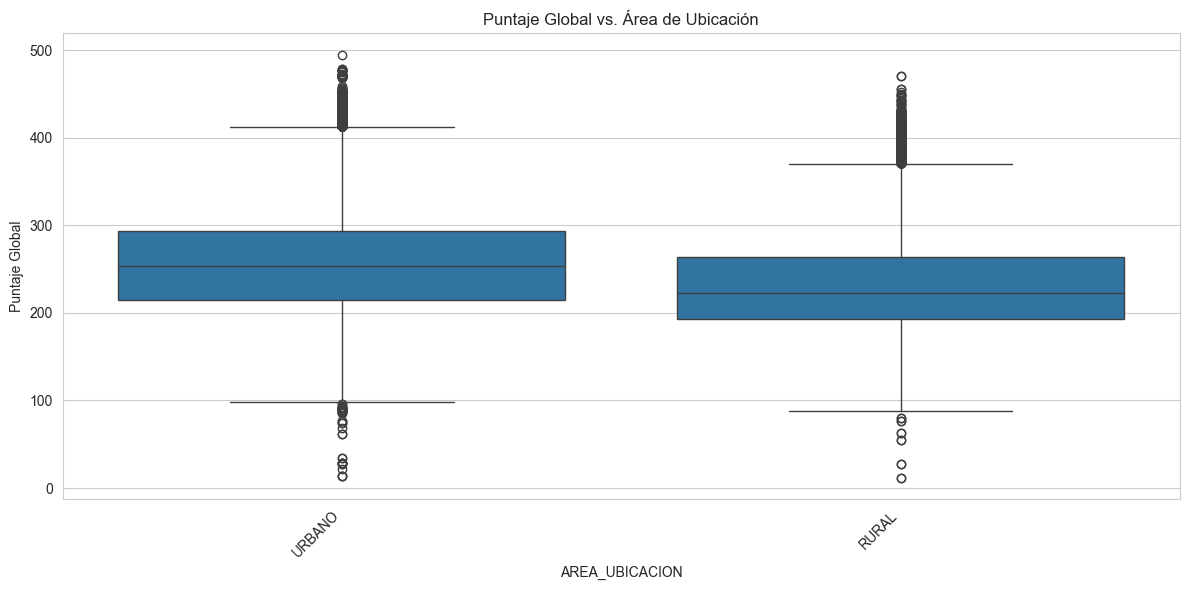

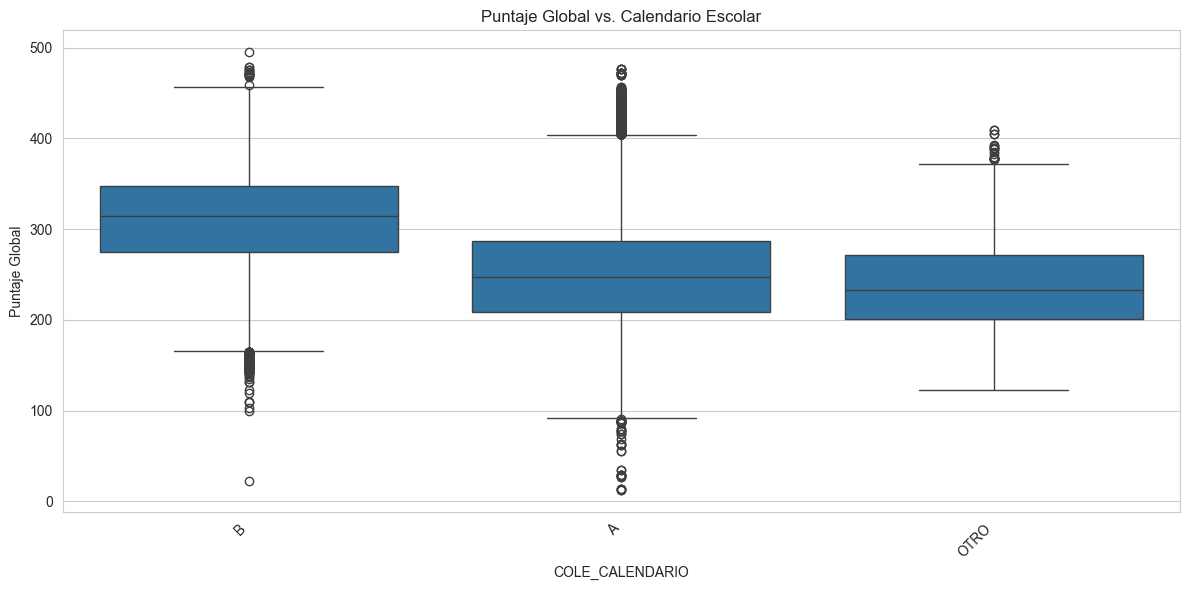

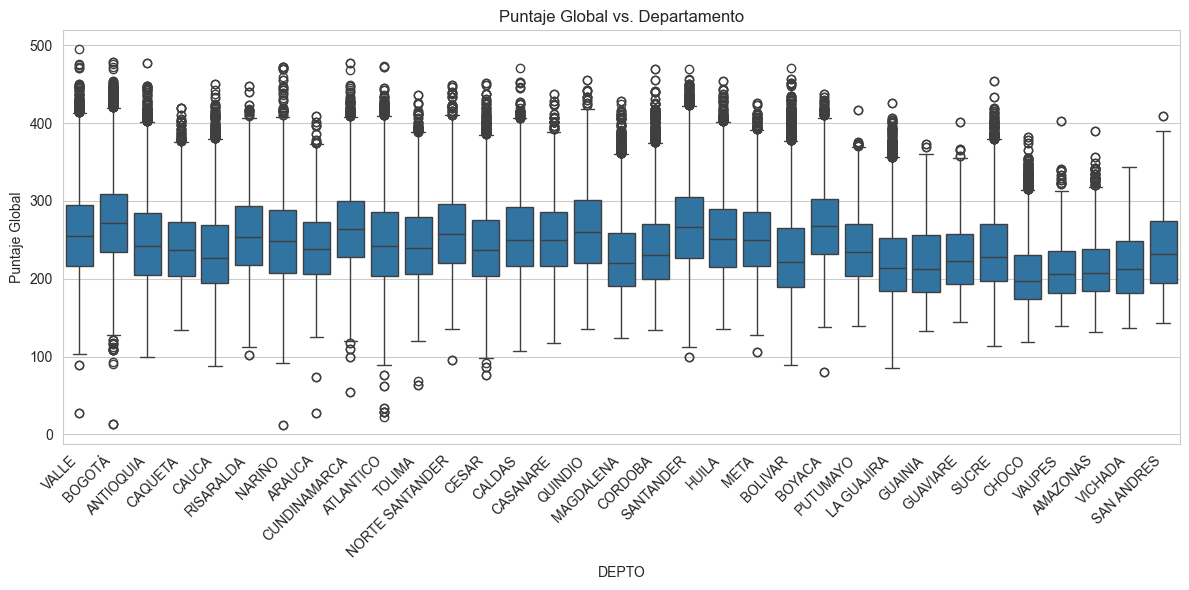

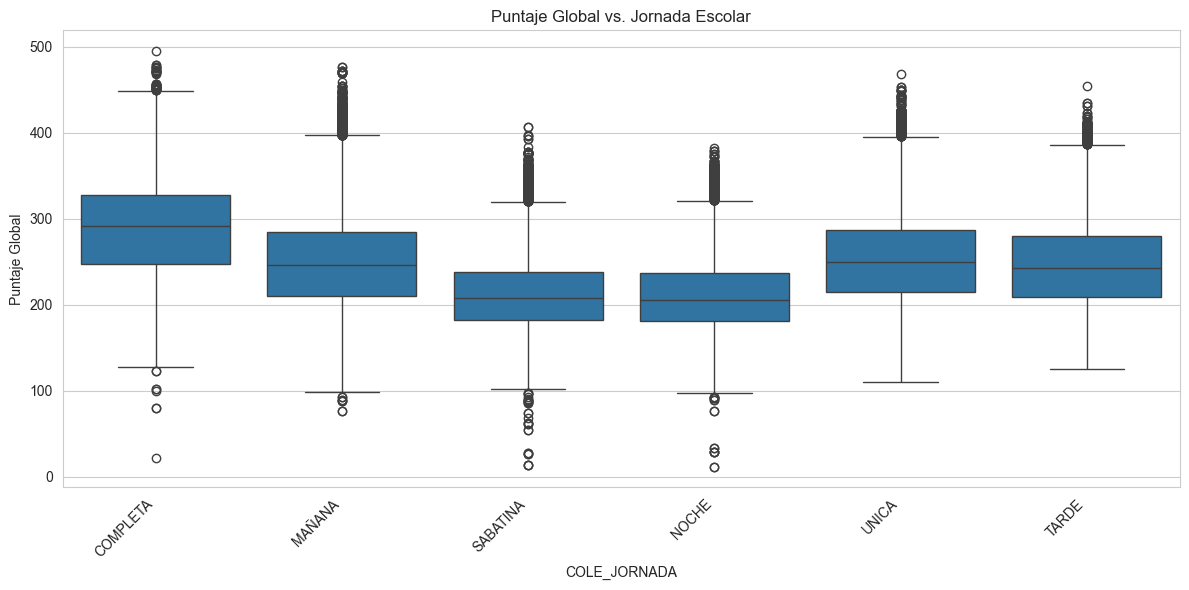

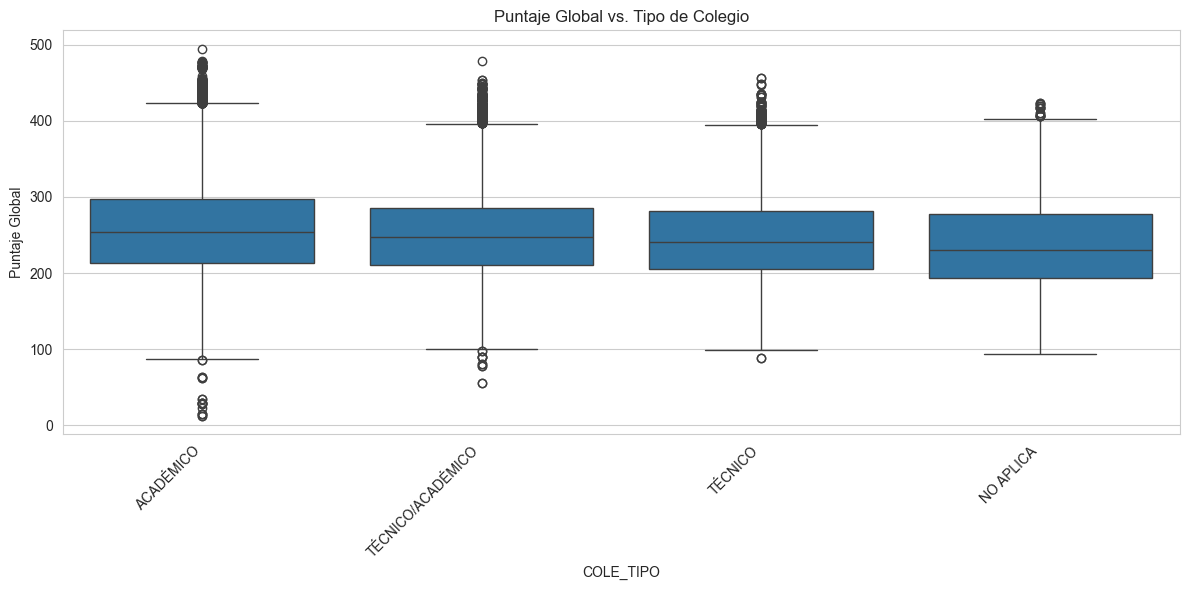

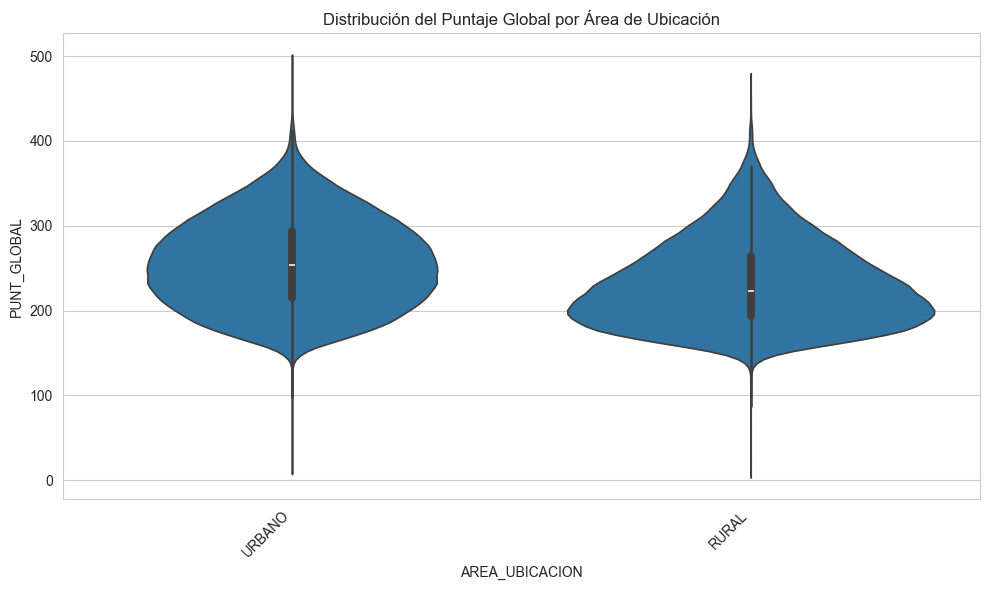

C:\Users\Jose Santamaria\AppData\Local\Temp\ipykernel_9760\2185434585.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='PUNT_GLOBAL', data=df, estimator= 'mean', ci=None)


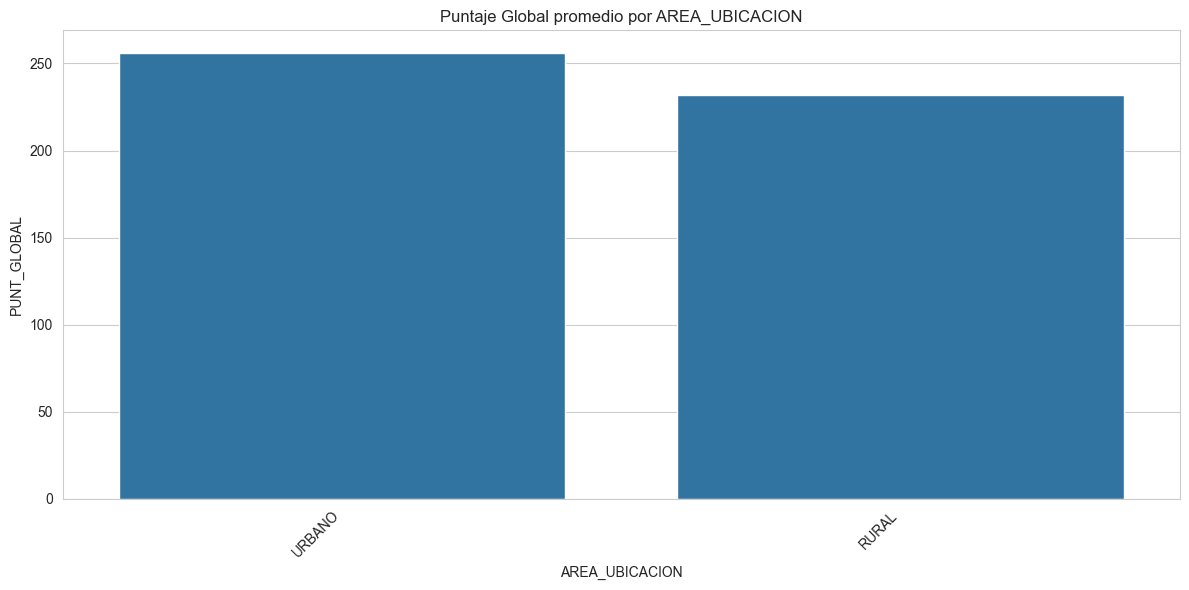

C:\Users\Jose Santamaria\AppData\Local\Temp\ipykernel_9760\2185434585.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='PUNT_GLOBAL', data=df, estimator= 'mean', ci=None)


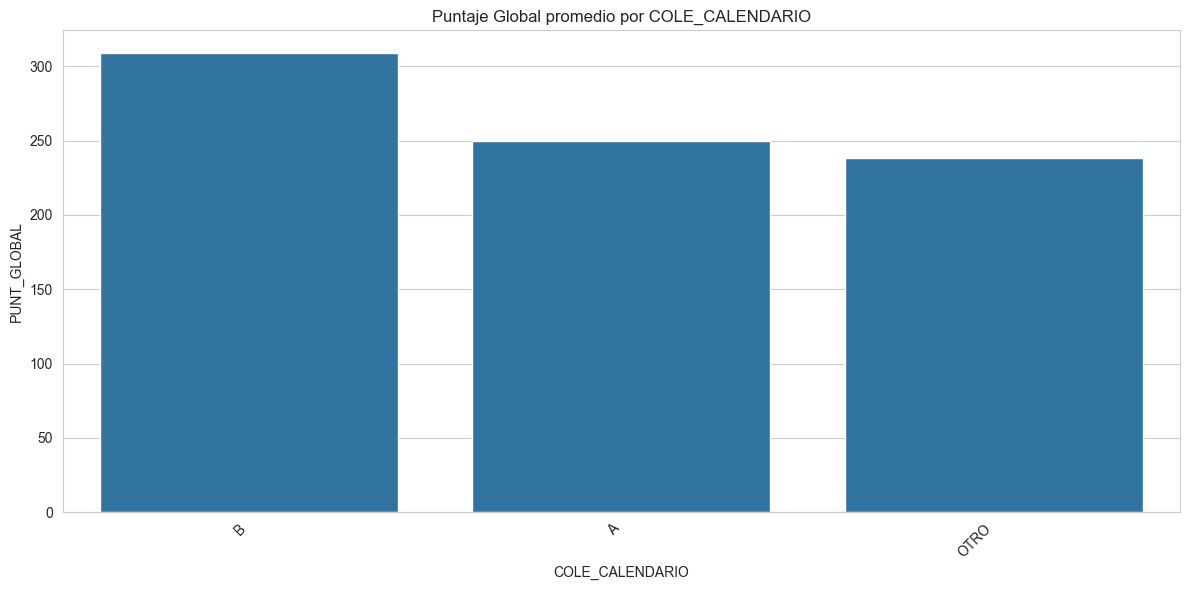

C:\Users\Jose Santamaria\AppData\Local\Temp\ipykernel_9760\2185434585.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='PUNT_GLOBAL', data=df, estimator= 'mean', ci=None)


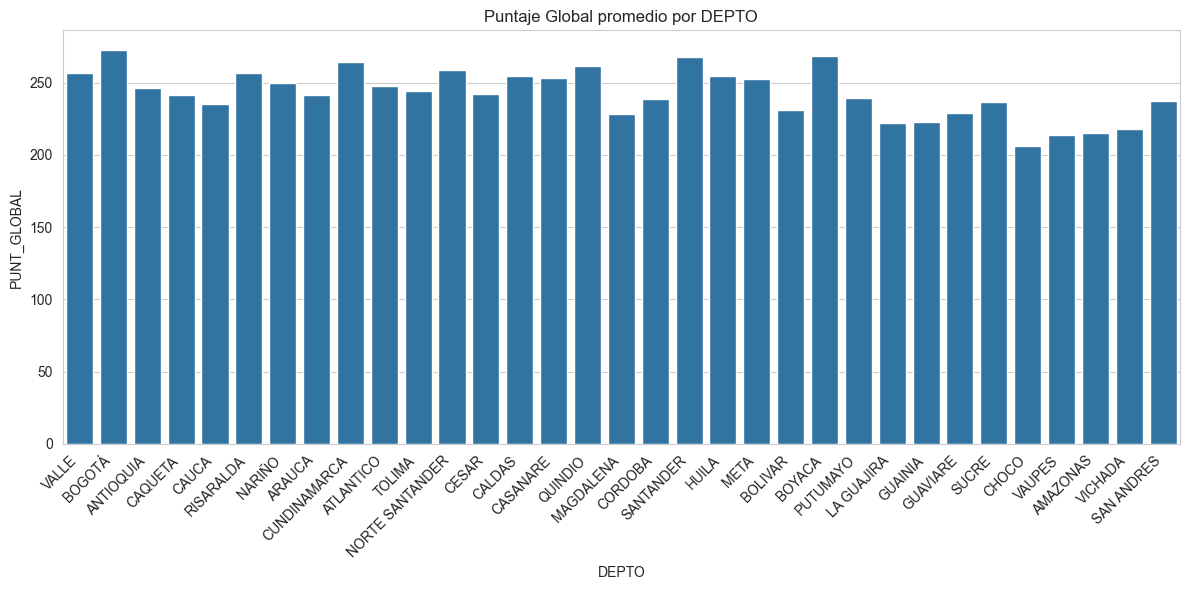

C:\Users\Jose Santamaria\AppData\Local\Temp\ipykernel_9760\2185434585.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='PUNT_GLOBAL', data=df, estimator= 'mean', ci=None)


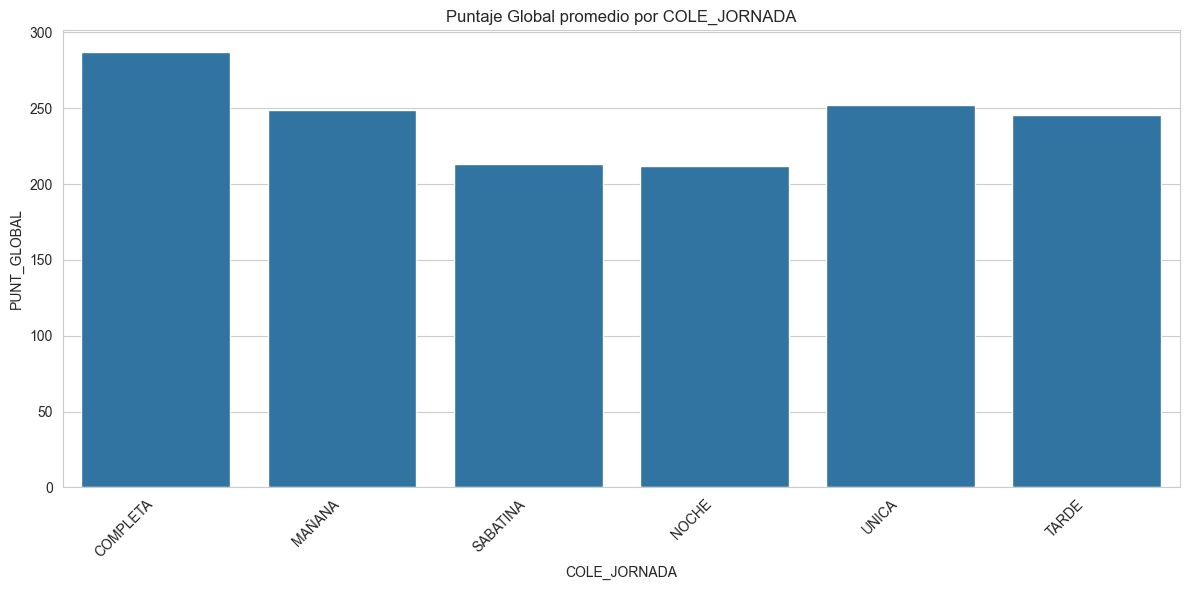

C:\Users\Jose Santamaria\AppData\Local\Temp\ipykernel_9760\2185434585.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='PUNT_GLOBAL', data=df, estimator= 'mean', ci=None)


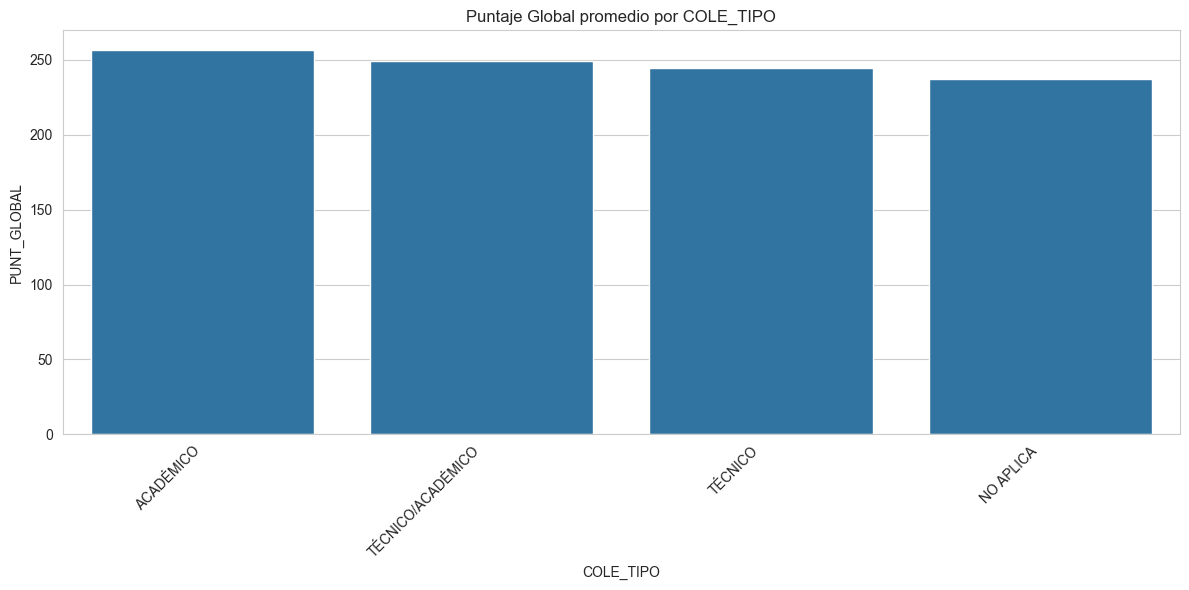

C:\Users\Jose Santamaria\AppData\Local\Temp\ipykernel_9760\2185434585.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='PUNT_GLOBAL', data=df, estimator= 'mean', ci=None)


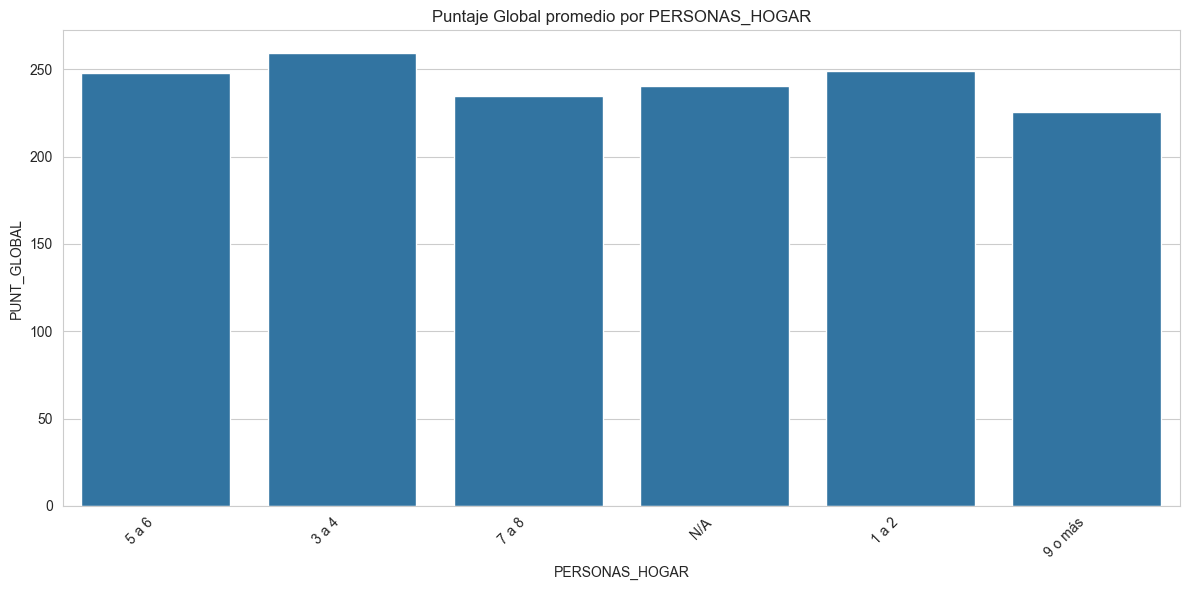

In [ ]:
#Graficar

# Configurar el estilo de los gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


# Función para crear gráficos de caja
def create_boxplot(df, column, title):
    plt.figure()
    sns.boxplot(x=column, y='PUNT_GLOBAL', data=df)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Puntaje Global')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Gráficos de caja
create_boxplot(df, 'AREA_UBICACION', 'Puntaje Global vs. Área de Ubicación')
create_boxplot(df, 'COLE_CALENDARIO', 'Puntaje Global vs. Calendario Escolar')
create_boxplot(df, 'DEPTO', 'Puntaje Global vs. Departamento')
create_boxplot(df, 'COLE_JORNADA', 'Puntaje Global vs. Jornada Escolar')
create_boxplot(df, 'COLE_TIPO', 'Puntaje Global vs. Tipo de Colegio')


# Gráfico de violín para una visualización alternativa
plt.figure(figsize=(10, 6))
sns.violinplot(x='AREA_UBICACION', y='PUNT_GLOBAL', data=df)
plt.title('Distribución del Puntaje Global por Área de Ubicación')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Gráficos de barras para ver la cantidad de estudiantes por categoría y su puntaje promedio
for col in ['AREA_UBICACION', 'COLE_CALENDARIO', 'DEPTO', 'COLE_JORNADA', 'COLE_TIPO', 'PERSONAS_HOGAR']:
  plt.figure(figsize=(12, 6))
  sns.barplot(x=col, y='PUNT_GLOBAL', data=df, estimator= 'mean', ci=None)
  plt.title(f'Puntaje Global promedio por {col}')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()



In [ ]:
print(df.columns)

Index(['PERIODO', 'TIPODOC', 'AREA_UBICACION', 'COLE_BILINGUE',
       'COLE_CALENDARIO', 'COLE_TIPO', 'DEPTO', 'COLE_GENERO', 'COLE_JORNADA',
       'MCPIO', 'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_NOMBRE_SEDE',
       'ESTU_DEPTO_PRESENTACION', 'ESTU_DEPTO_RESIDE', 'ESTU_ESTUDIANTE',
       'ESTU_FECHANACIMIENTO', 'ESTU_GENERO', 'ESTU_MCPIO_PRESENTACION',
       'ESTU_MCPIO_RESIDE', 'ESTU_NACIONALIDAD', 'ESTU_PAIS_RESIDE',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE',
       'ESTRATO', 'PERSONAS_HOGAR', 'TIENE_AUTO', 'TIENE_COMPUTADOR',
       'TIENE_INTERNET', 'TIENE_LAVADORA', 'PUNT_INGLES', 'PUNT_MATEMATICAS',
       'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA',
       'PUNT_GLOBAL'],
      dtype='object')


**Construcción de modelo de regresión lineal**

In [ ]:
#Desarrollo model de regresión lineal para predicción de los resultados

# Lista de columnas categóricas que se usarán como predictores
columnas_categoricas = [
    'PERIODO', 'AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO',
    'COLE_TIPO', 'DEPTO', 'COLE_GENERO', 'COLE_JORNADA', 'MCPIO',
    'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_NOMBRE_SEDE', 'ESTU_DEPTO_PRESENTACION',
    'ESTU_DEPTO_RESIDE', 'ESTU_ESTUDIANTE', 'ESTU_FECHANACIMIENTO',
    'ESTU_GENERO', 'ESTU_MCPIO_PRESENTACION', 'ESTU_MCPIO_RESIDE',
    'ESTU_NACIONALIDAD', 'ESTU_PAIS_RESIDE', 'FAMI_CUARTOSHOGAR',
    'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 'ESTRATO', 'PERSONAS_HOGAR',
    'TIENE_AUTO', 'TIENE_COMPUTADOR', 'TIENE_INTERNET', 'TIENE_LAVADORA'
]

objetivo = 'PUNT_GLOBAL'

# Quitar filas con valores faltantes
df_model = df[columnas_categoricas + [objetivo]].dropna()

# Separar X (predictoras) e y (objetivo)
X = df_model[columnas_categoricas]
y = df_model[objetivo]

# Transformador: one-hot para todo
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas)
    ]
)

# Pipeline: encoding + regresión lineal
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
pipeline.fit(X_train, y_train)

# Predecir y evaluar
y_pred = pipeline.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


MSE: 1487.833752933171
R²: 0.46173914452155085
RMSE: 38.57244810655879


In [ ]:
#Complemento del modelo de regresión usando el modelo ElasticNet

pipeline_en = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=0.5, l1_ratio=0.5, max_iter=10000))
])

pipeline_en.fit(X_train, y_train)
y_pred_en = pipeline_en.predict(X_test)
mse_en = mean_squared_error(y_test, y_pred_en)
print("MSE ElasticNet:", mse_en)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Parece que el modelo lineal hace un trabajo decente con los datos categoricos convertidos, pero tambien puede, aunque suponemos mas bien que el problema no es lineal, y deberiamos aplicar modelos más expresivos.

MSE ElasticNet: 2164.1151452867775
RMSE: 38.57244810655879


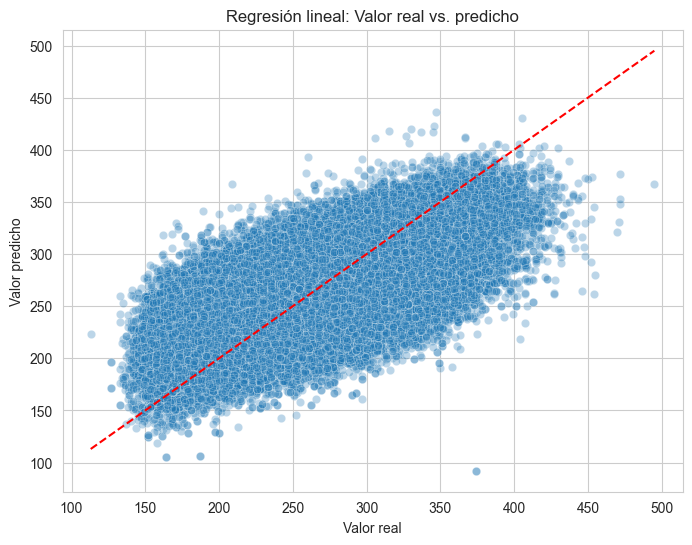

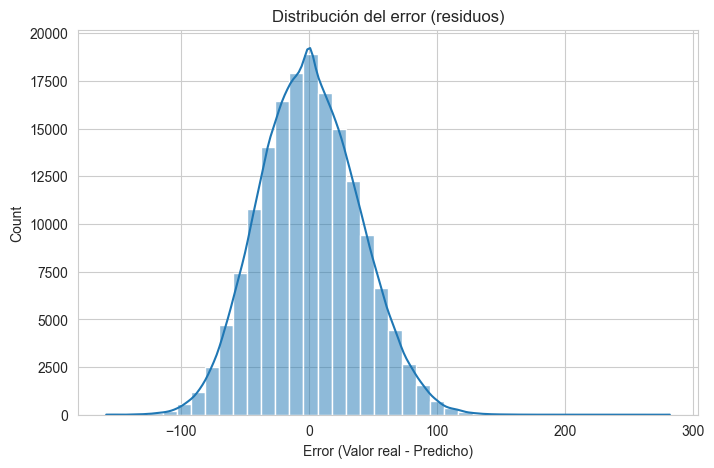

In [ ]:
#Gráfica del modelo de regresión lineal

# Predecimos los valores
y_pred = pipeline.predict(X_test)

# Gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea ideal
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.title('Regresión lineal: Valor real vs. predicho')
plt.grid(True)
plt.show()

errors = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(errors, bins=40, kde=True)
plt.title("Distribución del error (residuos)")
plt.xlabel("Error (Valor real - Predicho)")
plt.grid(True)
plt.show()


**Construcción modelo de regresión logística**

In [ ]:
#Construcción de modelo de regresión logística

# Definir las columnas
columnas_modelo = [
    'PERIODO', 'AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO',
    'COLE_TIPO', 'COLE_GENERO', 'COLE_JORNADA', 'ESTU_DEPTO_PRESENTACION',
    'ESTU_GENERO', 'ESTU_MCPIO_RESIDE', 'FAMI_CUARTOSHOGAR',
    'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 'ESTRATO', 'PERSONAS_HOGAR',
    'TIENE_AUTO', 'TIENE_COMPUTADOR', 'TIENE_INTERNET', 'TIENE_LAVADORA'
]


objetivo = 'PUNT_GLOBAL'

# Preparar DataFrame (solo columnas necesarias)
df_model = df[columnas_modelo + [objetivo]].copy()

# Convertir numéricos y reemplazar NaN
df_model['ESTRATO'] = pd.to_numeric(df_model['ESTRATO'], errors='coerce')
df_model['PERSONAS_HOGAR'] = pd.to_numeric(df_model['PERSONAS_HOGAR'], errors='coerce')

# Rellenar NaN: 0 para numéricos, "Desconocido" para categóricos
columnas_numericas = ['ESTRATO', 'PERSONAS_HOGAR']
columnas_categoricas = list(set(columnas_modelo) - set(columnas_numericas))

df_model[columnas_numericas] = df_model[columnas_numericas].fillna(0)
df_model[columnas_categoricas] = df_model[columnas_categoricas].fillna('Desconocido')

# Convertir el objetivo en clasificación binaria
umbral = df_model[objetivo].median()
df_model['PUNT_GLOBAL_BIN'] = (df_model[objetivo] > umbral).astype(int)

# Separar variables predictoras y objetivo
X = df_model[columnas_modelo]
y = df_model['PUNT_GLOBAL_BIN']

# Preprocesador para el pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), columnas_categoricas),
        ('num', 'passthrough', columnas_numericas)
    ]
)

# Crear pipeline con regresión logística
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Predecir y evaluar
y_pred = pipeline.predict(X_test)

# Resultados
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7064495767283406

Confusion matrix:
 [[78909 34011]
 [31562 78897]]

Classification report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.71    112920
           1       0.70      0.71      0.71    110459

    accuracy                           0.71    223379
   macro avg       0.71      0.71      0.71    223379
weighted avg       0.71      0.71      0.71    223379



In [ ]:
#Complemento del modelo de regresión logística haciendo iteraciones

# Definimos nuevamente el pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Grid de hiperparámetros
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2'],  # puedes probar 'l1' con solver='liblinear'
    'classifier__solver': ['lbfgs'],
    'classifier__class_weight': [None, 'balanced']
}

# Búsqueda con validación cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1', verbose=2)
grid_search.fit(X_train, y_train)

# Evaluamos en test
y_pred = grid_search.best_estimator_.predict(X_test)

print("Mejor combinación:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, classifier__solver=lbfgs; total time=  38.3s
[CV] END classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, classifier__solver=lbfgs; total time=  40.2s
[CV] END classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, classifier__solver=lbfgs; total time=  34.4s
[CV] END classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l2, classifier__solver=lbfgs; total time=  31.3s
[CV] END classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l2, classifier__solver=lbfgs; total time=  33.8s
[CV] END classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l2, classifier__solver=lbfgs; total time=  33.7s
[CV] END classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, classifier__solver=lbfgs; total time= 1.1min
[CV] END classifier__C=0.1

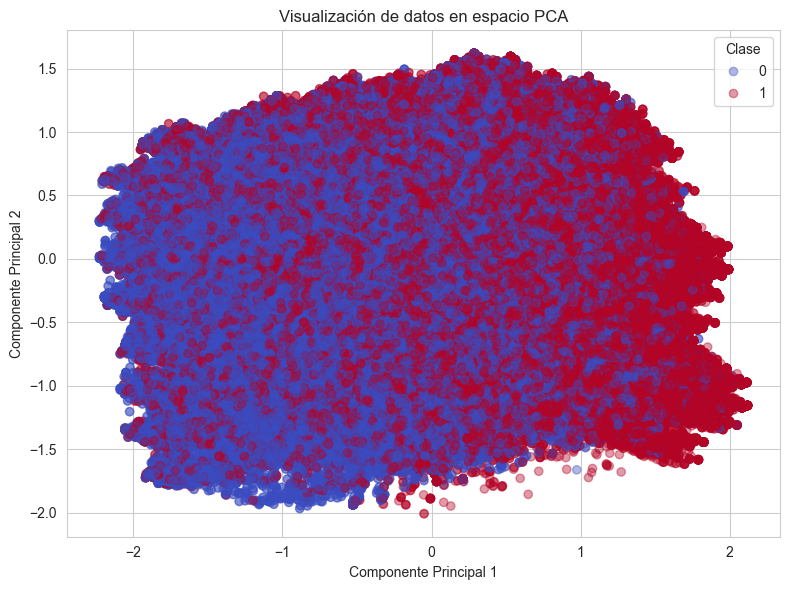

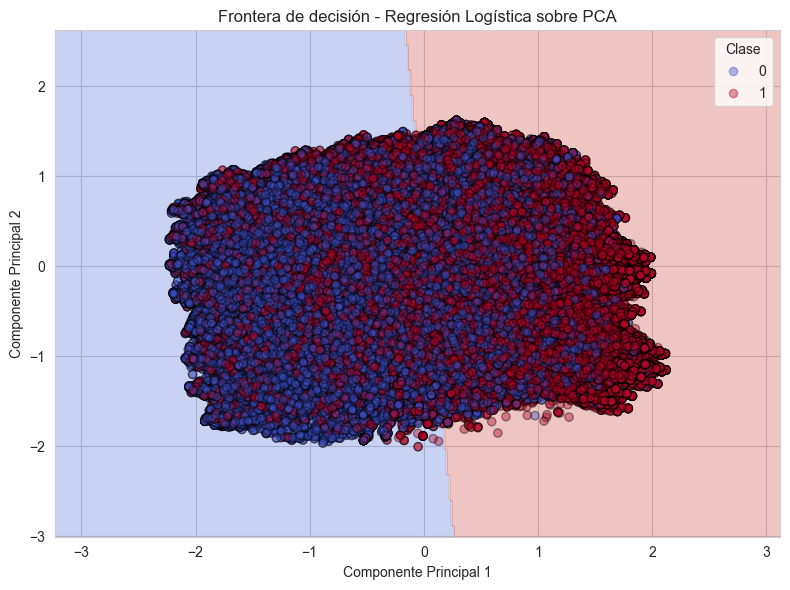

In [ ]:
#Construcción de gráfico PCA

# Definir columnas y objetivo
columnas_modelo = [
    'PERIODO', 'AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO',
    'COLE_TIPO', 'COLE_GENERO', 'COLE_JORNADA', 'ESTU_DEPTO_PRESENTACION',
    'ESTU_GENERO', 'ESTU_MCPIO_RESIDE', 'FAMI_CUARTOSHOGAR',
    'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 'ESTRATO', 'PERSONAS_HOGAR',
    'TIENE_AUTO', 'TIENE_COMPUTADOR', 'TIENE_INTERNET', 'TIENE_LAVADORA'
]
columnas_numericas = ['ESTRATO', 'PERSONAS_HOGAR']
columnas_categoricas = list(set(columnas_modelo) - set(columnas_numericas))
objetivo = 'PUNT_GLOBAL_BIN'

X = df_model[columnas_modelo]
y = df_model[objetivo]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), columnas_categoricas),
        ('num', 'passthrough', columnas_numericas)
    ]
)

# Pipeline PCA + regresión logística
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2)),
    ('classifier', LogisticRegression(max_iter=1000))
])

pipeline.fit(X, y)

# Obtener datos transformados
X_preprocessed = pipeline.named_steps['preprocessor'].transform(X)
X_pca = pipeline.named_steps['pca'].transform(X_preprocessed)

 #Dispersión PCA

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.4)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de datos en espacio PCA')
plt.legend(*scatter.legend_elements(), title="Clase")
plt.grid(True)
plt.tight_layout()
plt.show()

# Frontera de decisión

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predecir sobre la malla
Z = pipeline.named_steps['classifier'].predict(grid)
Z = Z.reshape(xx.shape)

# Graficar frontera
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.4)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Frontera de decisión - Regresión Logística sobre PCA')
plt.legend(*scatter.legend_elements(), title="Clase")
plt.grid(True)
plt.tight_layout()
plt.show()


**Construcción de modelo de árboles de decisión**

Accuracy: 0.6749649698494486

Confusion matrix:
 [[72359 40561]
 [32045 78414]]

Classification report:
               precision    recall  f1-score   support

           0       0.69      0.64      0.67    112920
           1       0.66      0.71      0.68    110459

    accuracy                           0.67    223379
   macro avg       0.68      0.68      0.67    223379
weighted avg       0.68      0.67      0.67    223379



C:\Users\Jose Santamaria\AppData\Local\Temp\ipykernel_9760\2149988417.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances_df, x='importance', y='feature', palette='viridis')


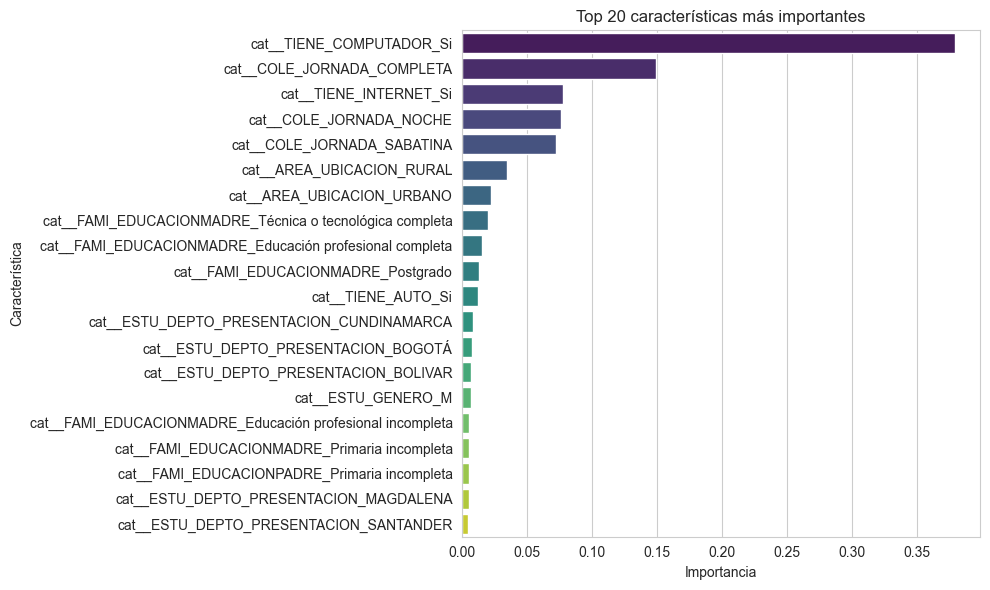

In [ ]:
#Construcción del modelo de árboles de decisión

#Columnas
columnas_modelo = [
    'PERIODO', 'AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO',
    'COLE_TIPO', 'COLE_GENERO', 'COLE_JORNADA', 'ESTU_DEPTO_PRESENTACION',
    'ESTU_GENERO', 'ESTU_MCPIO_RESIDE', 'FAMI_CUARTOSHOGAR',
    'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 'ESTRATO', 'PERSONAS_HOGAR',
    'TIENE_AUTO', 'TIENE_COMPUTADOR', 'TIENE_INTERNET', 'TIENE_LAVADORA'
]
columnas_numericas = ['ESTRATO', 'PERSONAS_HOGAR']
columnas_categoricas = list(set(columnas_modelo) - set(columnas_numericas))
objetivo = 'PUNT_GLOBAL_BIN'

#Separar X e y
X = df_model[columnas_modelo]
y = df_model[objetivo]

#Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), columnas_categoricas),
        ('num', 'passthrough', columnas_numericas)
    ]
)

# Pipeline con Árbol de Decisión
pipeline_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=10, random_state=42))
])

#División
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Entrenamiento
pipeline_tree.fit(X_train, y_train)

#Predicciones
y_pred = pipeline_tree.predict(X_test)

#Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

#Construcción de gráfico con las variables de mayor impacto al modelo

#Importancia de características
feature_names = pipeline_tree.named_steps['preprocessor'].get_feature_names_out()
importances = pipeline_tree.named_steps['classifier'].feature_importances_
importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False).head(20)

#Gráfico de importancia
plt.figure(figsize=(10, 6))
sns.barplot(data=importances_df, x='importance', y='feature', palette='viridis')
plt.title('Top 20 características más importantes')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()


In [ ]:
#Complemento implementación método de árbol de decisión mediante interaciones

columnas_modelo = [
    'PERIODO', 'AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO',
    'COLE_TIPO', 'COLE_GENERO', 'COLE_JORNADA', 'ESTU_DEPTO_PRESENTACION',
    'ESTU_GENERO', 'ESTU_MCPIO_RESIDE', 'FAMI_CUARTOSHOGAR',
    'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 'ESTRATO', 'PERSONAS_HOGAR',
    'TIENE_AUTO', 'TIENE_COMPUTADOR', 'TIENE_INTERNET', 'TIENE_LAVADORA'
]

objetivo = 'PUNT_GLOBAL'

df_model = df[columnas_modelo + [objetivo]].copy()
df_model['ESTRATO'] = pd.to_numeric(df_model['ESTRATO'], errors='coerce')
df_model['PERSONAS_HOGAR'] = pd.to_numeric(df_model['PERSONAS_HOGAR'], errors='coerce')
columnas_numericas = ['ESTRATO', 'PERSONAS_HOGAR']
columnas_categoricas = list(set(columnas_modelo) - set(columnas_numericas))
df_model[columnas_numericas] = df_model[columnas_numericas].fillna(0)
df_model[columnas_categoricas] = df_model[columnas_categoricas].fillna('Desconocido')

umbral = df_model[objetivo].median()
df_model['PUNT_GLOBAL_BIN'] = (df_model[objetivo] > umbral).astype(int)
X = df_model[columnas_modelo]
y = df_model['PUNT_GLOBAL_BIN']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), columnas_categoricas),
        ('num', 'passthrough', columnas_numericas)
    ]
)

X_encoded = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, stratify=y, random_state=42)

param_dist = {
    'max_depth': randint(10, 20),
    'min_samples_leaf': randint(1, 5),
    'criterion': ['gini', 'entropy']
}

clf_tree = DecisionTreeClassifier(random_state=42)
random_search = RandomizedSearchCV(
    clf_tree,
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    scoring='accuracy',
    n_jobs=1,
    random_state=42,
    verbose=2
)

random_search.fit(X_train, y_train)
y_pred_tree = random_search.predict(X_test)

print("=== Árbol de Decisión con RandomSearch ===")
print("Mejor Accuracy (validación cruzada):", random_search.best_score_)
print("Parámetros óptimos:", random_search.best_params_)
print("Accuracy (test):", accuracy_score(y_test, y_pred_tree))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_tree))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_tree))


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=1; total time= 1.3min
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=1; total time= 1.2min
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=1; total time= 1.1min
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=1; total time= 1.4min
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=1; total time= 1.4min
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=1; total time= 1.3min
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=2; total time= 1.2min
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=2; total time= 1.2min
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=2; total time= 1.2min
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=3; total time= 1.4min
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=3; total time= 1.4min
[CV] END ...criterion=gini, max_depth=16, min_sam